In [1]:
# Importing the modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import glob
import shutil
import re

In [2]:
# Definitions:

def read_file(filename, time_per_frame, skiplines):
    """
    time_per_frame = 0.005 ns"""
    with open(filename) as file:
        lines = file.readlines()
        total_lines = len(lines)
#         print('Total lines:', total_lines)
    # Read the data:
    rlines = lines[skiplines:]
    # Extract data from file
    data = np.array([list(map(float, line.strip().split())) for line in rlines])
#     print("Shape of data:", data.shape)
    header = lines[skiplines-1].strip().split()
    dt = (data[1][0] - data[0][0])*time_per_frame; # Time interval between data
    return header, dt, data

def porosity_avg(arr, avg_lines):
    """arr = Porosity data
    avg_lines = no. of lines to average after reading the data"""
    # Read the data into a pandas DataFrame
    pd_data = pd.DataFrame(arr, columns = header)
    avg_data = pd_data.groupby(pd_data.index // avg_lines).mean()
    return pd_data, avg_data

# GLOBAL CONTROL FOR THE PLOTS
plt.rcParams.update({'font.serif':'Arial', 'font.size': 15.0, 
                     'xtick.labelsize': 14, 'ytick.labelsize': 14,
                    'legend.fontsize':14,
                    'figure.dpi': 100.0, 'figure.figsize': [5, 4]})
# print(plt.rcParams)

# N2 atmosphere, 1000 K, Probe_radius: 2.97 A2

In [3]:
# Loading the data:
header, dt, N2_1000K = read_file('./N2_1000K_2ns_probe_radius_2.97.dat', 0.005, 1)

# avg_lines = 4
# N2_data = pd.DataFrame(N2_1000K, columns = header)
# N2_avg_data = N2_data.groupby(N2_data.index // avg_lines).mean()

N2_data, N2_avg_data = porosity_avg(N2_1000K, 6)
print("N2 header:", header)

N2 header: ['"Frame"', '"ConstructSurfaceMesh.empty_fraction"', '"ConstructSurfaceMesh.empty_region_count"', '"ConstructSurfaceMesh.empty_volume"', '"ConstructSurfaceMesh.filled_fraction"', '"ConstructSurfaceMesh.filled_region_count"', '"ConstructSurfaceMesh.filled_volume"', '"ConstructSurfaceMesh.specific_surface_area"', '"ConstructSurfaceMesh.surface_area"']


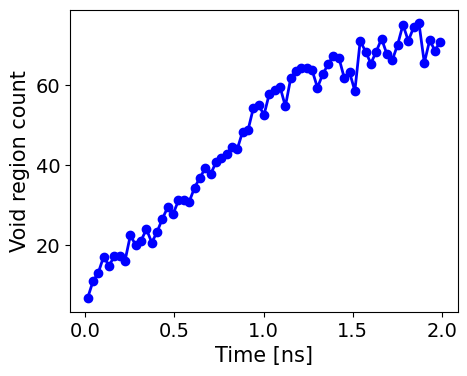

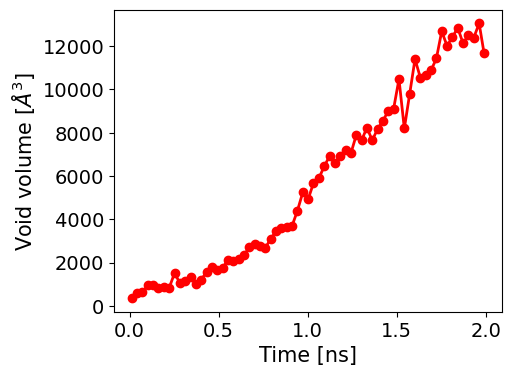

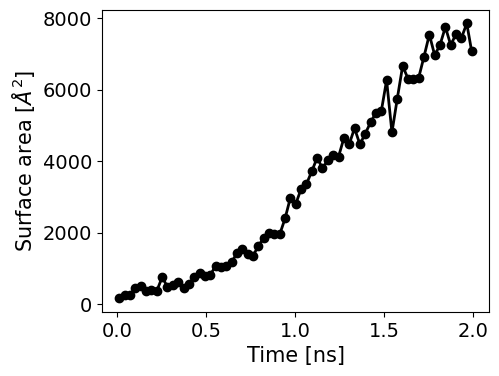

In [4]:
# Time vs Void region count:
#---------------------------
plt.plot(N2_avg_data['"Frame"']*dt, N2_avg_data['"ConstructSurfaceMesh.empty_region_count"'], 'ob-', linewidth=2)    # markeredgecolor='k'
# plt.xlim(-0.05, 6.8)
# plt.ylim(0, 0.7)
plt.xlabel('Time [ns]')
plt.ylabel('Void region count')
plt.savefig("./N2_voidregion_count_avg.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Time vs Void volume count:
#---------------------------
plt.plot(N2_avg_data['"Frame"']*dt, N2_avg_data['"ConstructSurfaceMesh.empty_volume"'], 'or-', linewidth=2)    # markeredgecolor='k'
# plt.xlim(-0.05, 6.8)
# plt.ylim(0, 0.7)
plt.xlabel('Time [ns]')
plt.ylabel('Void volume [$Å^3$]')
plt.savefig("./N2_voidvolume_avg.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Time vs Surface area:
#---------------------------
plt.plot(N2_avg_data['"Frame"']*dt, N2_avg_data['"ConstructSurfaceMesh.surface_area"'], 'ok-', linewidth=2)    # markeredgecolor='k'
# plt.xlim(-0.05, 6.8)
# plt.ylim(0, 0.7)
plt.xlabel('Time [ns]')
plt.ylabel('Surface area [$Å^2$]')
plt.savefig("./N2_surface_area_avg.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

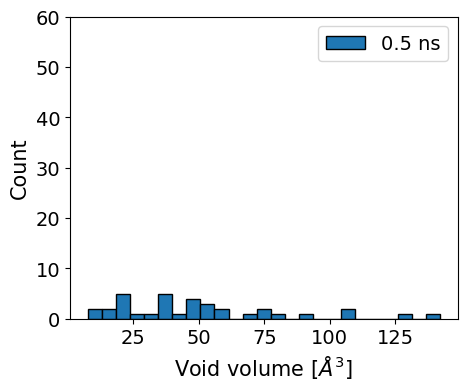

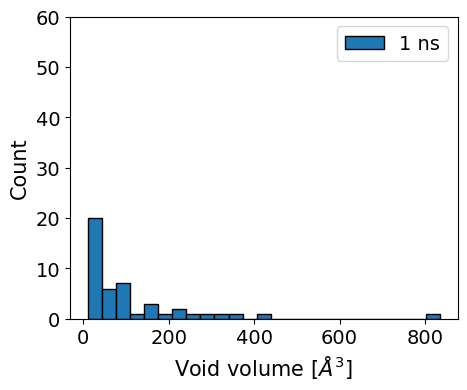

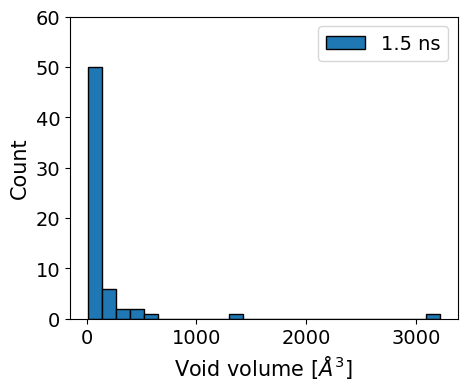

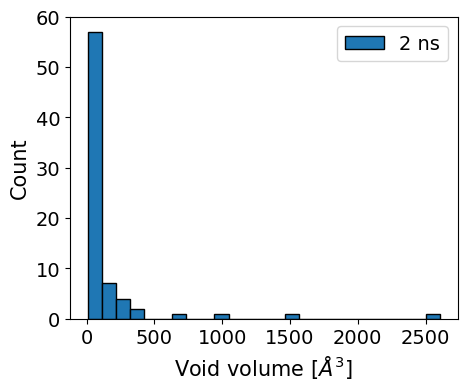

In [5]:
header, dt, N2_500ps = read_file('./N2_1000K_void_0.5ns.dat', 0, 1)
counts1, bin_edges1, _ = plt.hist(N2_500ps, bins=25, edgecolor='black', label='0.5 ns')
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
# plt.plot(bin_centers1, counts1, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
plt.ylim(0, 60)
# plt.yscale('log')
plt.legend()
plt.savefig("./N2_void_hist_0.5ns.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

header, dt, N2_1000ps = read_file('./N2_1000K_void_1ns.dat', 0, 1)
counts2, bin_edges2, _ = plt.hist(N2_1000ps, bins=25, edgecolor='black', label='1 ns')
# bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
# plt.plot(bin_centers2, counts2, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
plt.ylim(0, 60)
# plt.yscale('log')
plt.legend()
plt.savefig("./N2_void_hist_1ns.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

header, dt, N2_1500ps = read_file('./N2_1000K_void_1.5ns.dat', 0, 1)
counts3, bin_edges3, _ = plt.hist(N2_1500ps, bins=25, edgecolor='black', label='1.5 ns')
# bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
# plt.plot(bin_centers2, counts2, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
plt.ylim(0, 60)
# plt.yscale('log')
plt.legend()
plt.savefig("./N2_void_hist_1.5s.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

header, dt, N2_2000ps = read_file('./N2_1000K_void_2ns.dat', 0, 1)
counts4, bin_edges4, _ = plt.hist(N2_2000ps, bins=25, edgecolor='black', label='2 ns')
# bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
# plt.plot(bin_centers2, counts2, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
# plt.yscale('log')
plt.legend()
plt.ylim(0, 60)
plt.savefig("./N2_void_hist_2ns.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# plt.plot(bin_centers1, counts1, 'o-')
# plt.plot(bin_centers2, counts2, 'o-')
# plt.xlabel('Void volume [$Å^3$]')
# plt.ylabel('Count')
# plt.yscale('log')
# plt.show()


In [6]:
# header, dt, N2_1000ps = read_file('./N2_1000K_void_1ns.dat', 0, 1)
# counts, bin_edges, _ = plt.hist(N2_1000ps, bins=30, edgecolor='black')
# plt.xlabel('Void volume [$Å^3$]')
# plt.ylabel('Count')
# plt.show()

# bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
# new_counts = counts * bin_centers
# plt.plot(bin_centers, new_counts, 'or-')
# plt.show()

## O2 atmosphere, 1000 K, Probe_radius: 3.3 A2

In [7]:
# Loading the data:
header, dt, O2_1000K = read_file('./O2_1000K_2ns_probe_radius_2.97.dat', 0.005, 1)

# avg_lines = 4
# N2_data = pd.DataFrame(N2_1000K, columns = header)
# N2_avg_data = N2_data.groupby(N2_data.index // avg_lines).mean()

O2_data, O2_avg_data = porosity_avg(O2_1000K, 6)
print("O2 header:", header)

O2 header: ['"Frame"', '"ConstructSurfaceMesh.empty_fraction"', '"ConstructSurfaceMesh.empty_region_count"', '"ConstructSurfaceMesh.empty_volume"', '"ConstructSurfaceMesh.filled_fraction"', '"ConstructSurfaceMesh.filled_region_count"', '"ConstructSurfaceMesh.filled_volume"', '"ConstructSurfaceMesh.specific_surface_area"', '"ConstructSurfaceMesh.surface_area"']


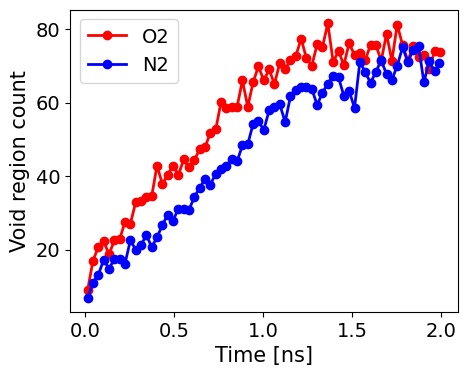

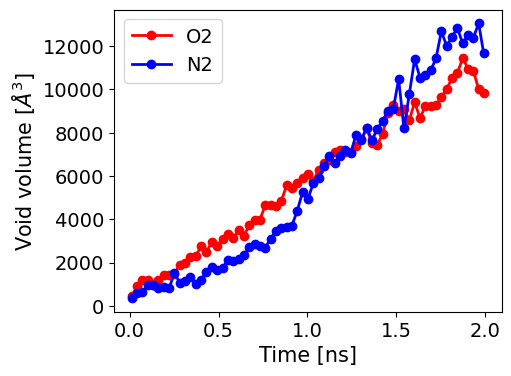

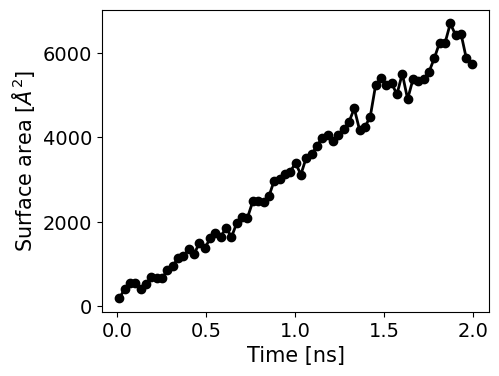

In [22]:
# Time vs Void region count:
#---------------------------
plt.plot(O2_avg_data['"Frame"']*0.005, O2_avg_data['"ConstructSurfaceMesh.empty_region_count"'], 'or-', linewidth=2, label='O2')    # markeredgecolor='k'
plt.plot(N2_avg_data['"Frame"']*0.005, N2_avg_data['"ConstructSurfaceMesh.empty_region_count"'], 'ob-', linewidth=2, label='N2')
# plt.xlim(-0.05, 6.8)
# plt.ylim(0, 0.7)
plt.xlabel('Time [ns]')
plt.ylabel('Void region count')
plt.legend()
plt.savefig("./N2_O2_voidregion_count_avg.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Time vs Void volume count:
#---------------------------
plt.plot(O2_avg_data['"Frame"']*0.005, O2_avg_data['"ConstructSurfaceMesh.empty_volume"'], 'or-', linewidth=2, label='O2')    # markeredgecolor='k'
plt.plot(N2_avg_data['"Frame"']*0.005, N2_avg_data['"ConstructSurfaceMesh.empty_volume"'], 'ob-', linewidth=2, label='N2')    # markeredgecolor='k'

# plt.xlim(-0.05, 6.8)
# plt.ylim(0, 0.7)
plt.xlabel('Time [ns]')
plt.ylabel('Void volume [$Å^3$]')
plt.legend()
plt.savefig("./O2_voidvolume_avg.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# Time vs Surface area:
#---------------------------
plt.plot(O2_avg_data['"Frame"']*0.005, O2_avg_data['"ConstructSurfaceMesh.surface_area"'], 'ok-', linewidth=2)    # markeredgecolor='k'
# plt.xlim(-0.05, 6.8)
# plt.ylim(0, 0.7)
plt.xlabel('Time [ns]')
plt.ylabel('Surface area [$Å^2$]')
plt.savefig("./O2_surface_area_avg.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

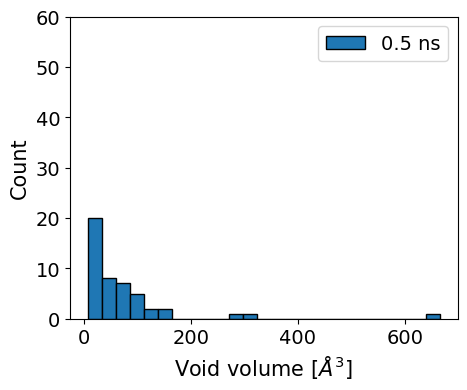

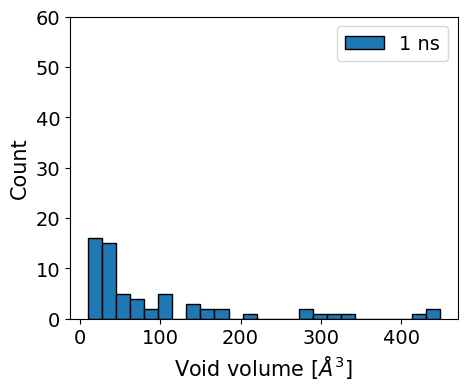

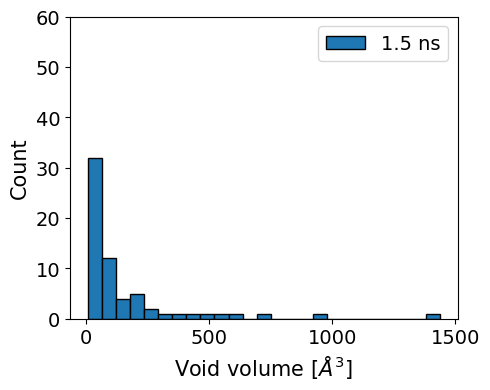

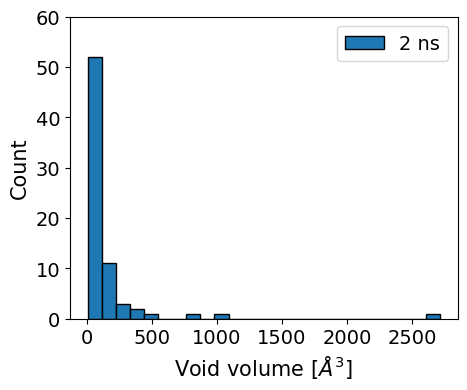

In [9]:
header, dt, O2_500ps = read_file('./O2_1000K_void_0.5ns.dat', 0, 1)
counts1, bin_edges1, _ = plt.hist(O2_500ps, bins=25, edgecolor='black', label='0.5 ns')
bin_centers1 = (bin_edges1[:-1] + bin_edges1[1:]) / 2
# plt.plot(bin_centers1, counts1, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
# plt.yscale('log')
plt.legend()
plt.ylim(0, 60)
plt.savefig("./O2_void_hist_0.5ns.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

header, dt, O2_1000ps = read_file('./O2_1000K_void_1ns.dat', 0, 1)
counts2, bin_edges2, _ = plt.hist(O2_1000ps, bins=25, edgecolor='black', label='1 ns')
# bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
# plt.plot(bin_centers2, counts2, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
# plt.yscale('log')
plt.legend()
plt.ylim(0, 60)
plt.savefig("./O2_void_hist_1ns.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

header, dt, O2_1500ps = read_file('./O2_1000K_void_1.5ns.dat', 0, 1)
counts3, bin_edges3, _ = plt.hist(O2_1500ps, bins=25, edgecolor='black', label='1.5 ns')
# bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
# plt.plot(bin_centers2, counts2, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
# plt.yscale('log')
plt.legend()
plt.ylim(0, 60)
plt.savefig("./O2_void_hist_1.5s.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

header, dt, O2_2000ps = read_file('./O2_1000K_void_2ns.dat', 0, 1)
counts4, bin_edges4, _ = plt.hist(O2_2000ps, bins=25, edgecolor='black', label='2 ns')
# bin_centers2 = (bin_edges2[:-1] + bin_edges2[1:]) / 2
# plt.plot(bin_centers2, counts2, 'or-')
plt.xlabel('Void volume [$Å^3$]')
plt.ylabel('Count')
# plt.yscale('log')
plt.legend()
plt.ylim(0, 60)
plt.savefig("./O2_void_hist_2ns.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# plt.plot(bin_centers1, counts1, 'o-')
# plt.plot(bin_centers2, counts2, 'o-')
# plt.xlabel('Void volume [$Å^3$]')
# plt.ylabel('Count')
# plt.yscale('log')
# plt.show()

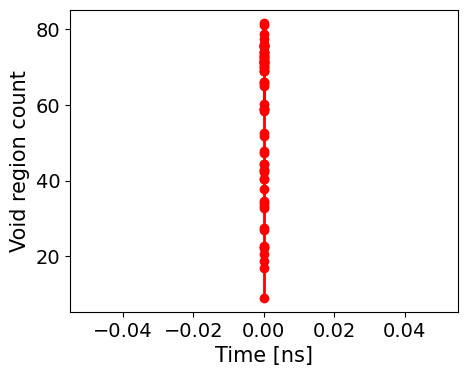

In [12]:
# Time vs Void region count:
#---------------------------
# plt.plot(N2_avg_data['"Frame"']*dt, N2_avg_data['"ConstructSurfaceMesh.empty_region_count"'], 'ob-', linewidth=2)    # markeredgecolor='k'
plt.plot(O2_avg_data['"Frame"']*dt, O2_avg_data['"ConstructSurfaceMesh.empty_region_count"'], 'or-', linewidth=2)    # markeredgecolor='k'
# plt.xlim(-0.05, 6.8)
# plt.ylim(0, 0.7)
plt.xlabel('Time [ns]')
plt.ylabel('Void region count')
# plt.savefig("./N2_voidregion_count_avg.tiff", dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()